# **Machine Learning and Statistics Tasks**

***

Author: Roberto Vergano

**Python modules required**

In [56]:
from IPython.display import display, Math
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.stats import probplot
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import sklearn.decomposition as dec
import sklearn as sk
import sklearn.preprocessing as pre
import sklearn.neighbors as ne

**Table of contents**

Task 1. The Newton´s method.  
Task 2. Chi squared test.  
Task 3. T-test.  
Task 4. The setosa class.  
Task 5. Principal component analysis on the Iris dataset.  

## **Task 1. The Newton´s method**

***

Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such
as math. In this task,(1) you should write a function sqrt(x) to approximate the square root of a floating point number x without
using the power operator or a package.

Rather, you should use the Newton’s method.(2) Start with an 2 Square Roots via Newton’s Method. initial guess for the square root called z0. You then repeatedly improve it using the following formula, until the difference between
some previous guess zi and the next zi+1 is less than some threshold, say 0.01.

In [57]:
# For LaTex code:
latex_code = r"z_{i+1} = z_i - \frac{{z_i*z_i - x}}{{2z_i}}"
display(Math(latex_code))

<IPython.core.display.Math object>

Where: 

zi = current estimate or iteration in the sequence.  
zi+1 = next estimate or iteration in the sequence.  
x = constant or parameter.  

**How does the formula work?**

1. Initial guess,z0
2. Iteration. For each iteration (i), the formula computes zi+1 from the current estimate zi.
3. Convergence. This iteration repeats until zi+1 is close enough to zi. This means that the process is repeated until the root of the equation is approached.

In [58]:
# Funtion "sqrt" takes the input from the user to calculate the square root using the Newton formula.
def sqrt(x):
    # Initial guess
    z = x / 4.0

    # Iterative approximation using Newton method. 
    for i in range(100):
        z = z - (((z*z) - x) / (2*z))

    return z

# Example 1
x = 25
result = sqrt(x)
print(f"The square root of {x} is approximately {result}")


The square root of 25 is approximately 5.0


In [59]:
# Example 2
x = 27
result = sqrt(x)
print(f"The square root of {x} is approximately {result}")

The square root of 27 is approximately 5.196152422706632


In [60]:
# Example 3
x = 13
result = sqrt(x)
print(f"The square root of {x} is approximately {result}")

The square root of 13 is approximately 3.605551275463989


In [61]:
# Example 4
x = 7
result = sqrt(x)
print(f"The square root of {x} is approximately {result}")

The square root of 7 is approximately 2.6457513110645907


**REFERENCES**

1. A Tour of Go. Aug. 18, 2023. url: https://go.dev/tour/flowcontrol/8 (visited on 08/18/2023).
2. Square Roots via Newton’s Method. Feb. 4, 2015. url: https://math.mit.edu/~stevenj/18.335/newtonsqrt. pdf (visited on 08/18/2023).


## **Task 2. Chi squared test**

***

Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.

In [62]:
# To create a DataFrame
data = {
    'Chocolate': [43, 56],
    'Plain': [57, 45]
}

index = ['Coffee', 'Tea']

df = pd.DataFrame(data, index=index)

# function to add borders for the table:
def borders(s):
    return f'border: 1px solid black;'

# Apply the style function to the DataFrame
df_border = df.style.applymap(borders)

# Display the styled DataFrame
df_border

,Chocolate,Plain
Coffee,43,57
Tea,56,45


For this table, we have 2 nominal variables:  
- biscuits (chocolate/plain)  
- drink (biscuits/tea)  

To calcule the chi-squared test we are going to transform the dataframe in a numpy array and then run the chi-squared test for contingency tables available in spicy.stats website.(1) Finally, we will compare the chi square results with and without the continuity correction.

In [63]:
# Create numpy array with the contingency table
observed_data = np.array([[43, 57], [56, 45]])

# chi-squared test with "correction=True"
chi2_stat, p_val, dof, expected = chi2_contingency(observed_data, correction=True)

# chi-squared test with "correction=False"
chi2_stat_no_correction, p_val_no_correction, dof_no_correction, expected_no_correction = chi2_contingency(observed_data, correction=False)

# To display the results in a table
table_data = [
    ["Chi-squared Statistic", chi2_stat, chi2_stat_no_correction],
    ["P-value", p_val, p_val_no_correction],
    ["Degrees of Freedom", dof, dof_no_correction],
    ["Expected Frequencies", ""],
    ["", expected[0, 0], expected_no_correction[0, 0]],
    ["", expected[0, 1], expected_no_correction[0, 1]],
    ["", expected[1, 0], expected_no_correction[1, 0]],
    ["", expected[1, 1], expected_no_correction[1, 1]],
]

table = tabulate(table_data, headers=["Statistic", "Value (correction=True)", "Value (correction=False)"], tablefmt="fancy_grid", colalign=("center", "center", "center"))

print(table)

╒═══════════════════════╤═══════════════════════════╤════════════════════════════╕
│       Statistic       │  Value (correction=True)  │  Value (correction=False)  │
╞═══════════════════════╪═══════════════════════════╪════════════════════════════╡
│ Chi-squared Statistic │    2.6359100836554257     │          3.11394           │
├───────────────────────┼───────────────────────────┼────────────────────────────┤
│        P-value        │    0.10447218120907394    │         0.0776251          │
├───────────────────────┼───────────────────────────┼────────────────────────────┤
│  Degrees of Freedom   │             1             │             1              │
├───────────────────────┼───────────────────────────┼────────────────────────────┤
│ Expected Frequencies  │                           │                            │
├───────────────────────┼───────────────────────────┼────────────────────────────┤
│                       │     49.25373134328358     │          49.2537           │
├───

**RESULTS**  
1. Chi-squared Statistic: the results for both (correction = True/False) are significantly greater than zero. This may suggest no relationship between drink and biscuit preference. 
2. P-Value: assuming a P-Value =< 0.05 as stadistically significant, the results for both (correction = True/False) suggest no relationship between drink and biscuit preference.  
3. Correction (True/False): the continuity correction does not seem to have much effect on the overall result. 

**REFERENCES**  
1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html  

## **TASK 3. T-Test**

***

Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

The pinguins dataset was downloaded from https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

First, we need to access the dataset using pandas. Then, we need to find the target columns and check the distribution before performing the t-test.

**READ AND DESCRIBE THE DATASET**

In [64]:
# "read_csv" from pandas to open and read the dataset.
dt = pd.read_csv("datasets/penguins.csv")
# info () to see a summary of the dataset.
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Our target columns are 0 ("species), 5 ("body_mass_g") and 6 ("sex"). Therefore, we need to extract our target population from the dataset ("Gentoo penguins"). Then separate by sex and select the parameter we want to test ("body_mass") 

In [65]:
# Describe the "species" column. 
dt["species"].describe()

count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object

**EXTRACT THE DATA FROM THE DATASET**

The unique value indicate that we have 3 categorical values in the dataset corresponding to 3 different species. Therefore, we need to extract the Gentoo species from the data.

In [66]:
# First, we extract in "df" variable the Gentoo penguins. 
df = dt.loc[dt["species"]=="Gentoo"]

# Separate by sex:
male = df.loc[df["sex"] == "MALE"]
female = df.loc[df["sex"] == "FEMALE"]

# Count the number of samples in each sex:
m_sample = male.shape[0]
f_sample = female.shape[0]
print("Number of male samples:", m_sample)
print("Number of female sample",f_sample)

Number of male samples: 61
Number of female sample 58


We have a difference of 3 samples between both sex due to NULL values. In order to keep both groups with the same number of samples, we are going to randomnly select 58 samples from the male group.

In [67]:
# Sample from pandas to select 58 random rows.
male_random = male.sample(58)
male_random.shape[0]

58

**DESCRIPTIVE STADISTICS**

Finally, we need to get the data only for the body_mass column for each group. 

In [68]:
male_mass = male_random["body_mass_g"]
female_mass = female["body_mass_g"]
print("Gentoo male body mass descriptive stadistics:")
print(male_mass.describe())
print()
print("Gentoo female body mass descriptive stadistics:")
print(female_mass.describe())

Gentoo male body mass descriptive stadistics:
count      58.000000
mean     5478.017241
std       319.198475
min      4750.000000
25%      5262.500000
50%      5500.000000
75%      5700.000000
max      6300.000000
Name: body_mass_g, dtype: float64

Gentoo female body mass descriptive stadistics:
count      58.000000
mean     4679.741379
std       281.578294
min      3950.000000
25%      4462.500000
50%      4700.000000
75%      4875.000000
max      5200.000000
Name: body_mass_g, dtype: float64


From the descriptive analysis, we can see that, on average, the body mass of the male Gentoo is higher than the female Gentoo. Using an histogram we can see how the body mass values for each sex are distributed.

**GENTOO BODY MASS/SEX HISTOGRAM**

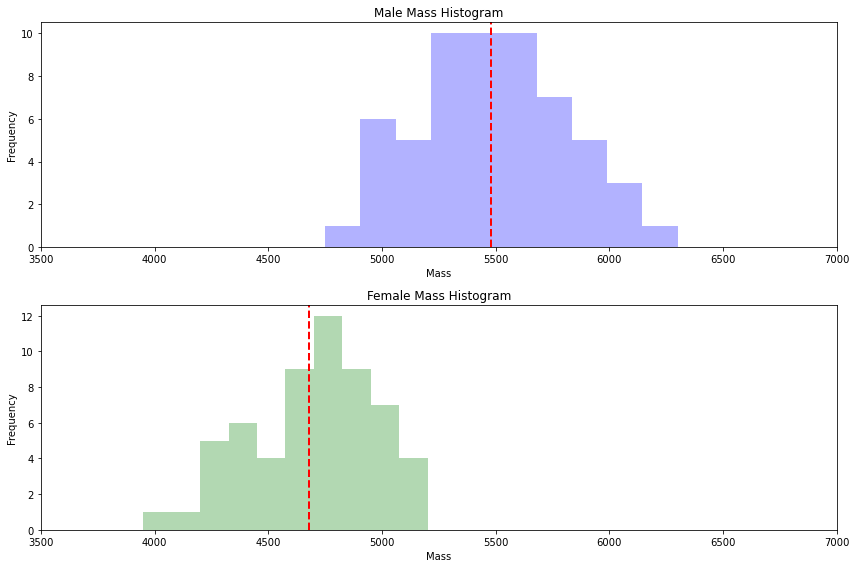

In [69]:
# Create the dataframe:
data = pd.DataFrame({
    "male mass": male_mass,
    "female mass": female_mass
})

# Create histograms
plt.figure(figsize=(12, 8))

# Histogram for male_mass
plt.subplot(2, 1, 1)
plt.hist(data["male mass"], bins=10, color="blue", alpha=0.3)
mean_male = data["male mass"].mean()  
plt.axvline(mean_male, color="red", linestyle="dashed", linewidth=2, label=f"Mean Male Mass: {mean_male:.2f}")  
plt.title("Male Mass Histogram")
plt.xlabel("Mass")
plt.ylabel("Frequency")
plt.xlim(3500, 7000)

# Histogram for female_mass
plt.subplot(2, 1, 2)
plt.hist(data["female mass"], bins=10, color="green", alpha=0.3)
mean_female = data["female mass"].mean() 
plt.axvline(mean_female, color="red", linestyle="dashed", linewidth=2, label=f"Mean Female Mass: {mean_female:.2f}") 
plt.title("Female Mass Histogram")
plt.xlabel("Mass")
plt.ylabel("Frequency")
plt.xlim(3500, 7000)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


The histogram shows: 
- Differences between the male and female body mass. Overall, the male body mass seems to be higher than the female body mass in the Gentoo species. 
- Data seems to be normally distributed for both, male and female body mass. 

In order to perform the T-test, we need to confirm whether the data comes from a normally distribution or not. Since the t-test assumes that the sample mean approaches a normal distribution. To confirm it, we are going to do a probability plot and the shapiro-wilk test.

**PROBABILITY PLOT**

The probability plot is a graphical technique which allows to assess whether a data set follows a distribution such as the normal distribution.(1)

We are going to use the "scipy.stats.probplot" from spicy stats to generate the probability plot of both (male and female body mass) againts the quantiles of a normal distribution.(2) If the data is normally distributed, the points will be close to the diagonal line.(3)

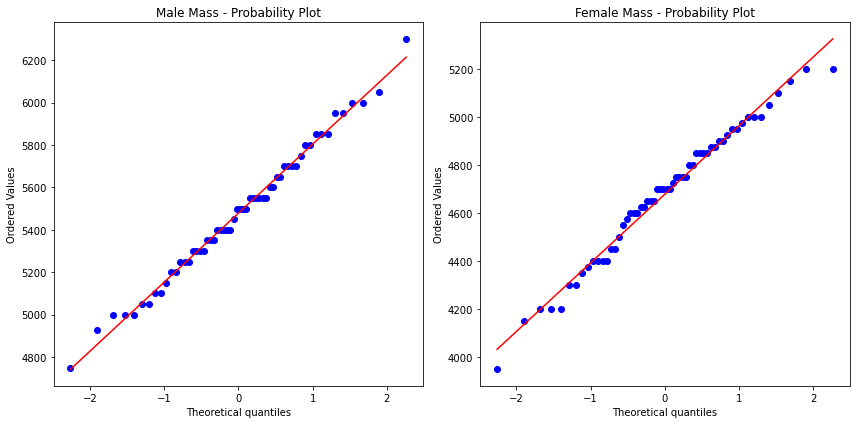

In [70]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Probability plot for male_mass
probplot(male_mass, plot=axes[0])
axes[0].set_title("Male Mass - Probability Plot")

# Probability plot for female_mass
probplot(female_mass, plot=axes[1])
axes[1].set_title("Female Mass - Probability Plot")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The male and female body mass seem to closely follow a straight line, suggesting that the data for both variables are approximately normally distributed. 

**SHAPIRO-WILK TEST**

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.(4)

We are going to use the "scipy.stats.shapiro" from spicicy.stats.(4)

If the p-value is small, there is a low probability that the data comes from a normal distribution, providing evidence against the null hypothesis.(4)

In [71]:
# Shapiro-Wilk test
stat, p_value = shapiro(male_mass)
statf, p_valuef = shapiro(female_mass)

# Create a table
table_data = {
    "Variable": ["Male Mass", "Female Mass"],
    "Test Statistic": [stat, statf],
    "p-value": [p_value, p_valuef],
}

# Display the table
shapiro_table = tabulate(table_data, headers="keys", tablefmt="fancy_grid")
print(shapiro_table)

╒═════════════╤══════════════════╤═══════════╕
│ Variable    │   Test Statistic │   p-value │
╞═════════════╪══════════════════╪═══════════╡
│ Male Mass   │         0.992349 │  0.974155 │
├─────────────┼──────────────────┼───────────┤
│ Female Mass │         0.981331 │  0.510652 │
╘═════════════╧══════════════════╧═══════════╛


Male and Female body mass have a high p-value, showing evidence against the null hypothesis. 

The results from the probability plot and the Shapiro-Wilk test indicate that male and female body mass approaches a normal distribution. 

We can now perform the t-test to find out whether the difference seen between male and female body mass in Gentoo species is statistically significant or not.

**T-TEST**  


Using "scipy.stats.ttest_ind" from spicy.stats, we can calculate the t-test for the means of two independent samples.(4)

For the null hypothesis, we can assume that the 2 independent samples have identical average values.(4)

In [72]:
# t-test:
t_statistic, p_value = ttest_ind(male_mass, female_mass)

# Display the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 14.282987483719584
P-value: 3.7308217352133355e-27


**RESULTS**

1. The T-statistic value measures indicates a big difference between both sample group means.  
2. The low p-value indicates that this difference is statistically significant. 
3. Therefore, there is a statistically significant difference in the body mass between male and female gentoo penguins.

**References**
1. Probability plot: https://www.itl.nist.gov/div898/handbook/eda/section3/probplot.htm  
2. Spicy.stats Probability Plot: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html  
3. Laerd Statistics: https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php  
4. Spicy.stats Shapiro test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html  
5. Spicy.stats website (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

## **TASK 4. THE SETOSA CLASS**

***

Using the famous iris data set suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.

Iris Data set downloaded from : UCI Machine Learning Repository.
Aug. 17, 2023. url: https://archive.
ics.uci.edu/dataset/53/iris
(visited on 08/17/2023).

The aim from this task is to separate each attribute for the setosa class. Then compare it against the attributes from versicolor and virginica class. And finally, to determine whether the difference between the setosa class is statistically significant.

**READ AND DESCRIBE THE DATA SET**

In [73]:
# Read the csv file
iris_ds = pd.read_csv("datasets/iris.csv")
# Create dataframe with pandas:
idf = pd.DataFrame(iris_ds)
# Summary of dataframe:
iris_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**DISTRIBUTION OF EACH ATTRIBUTE PER CLASS**

Using "seaborn.pairplot" from seaborn we can visualize the data distribution for each attribute per class (kernel density estimate) and the relationship between attributes per class (scatter plot).(1)

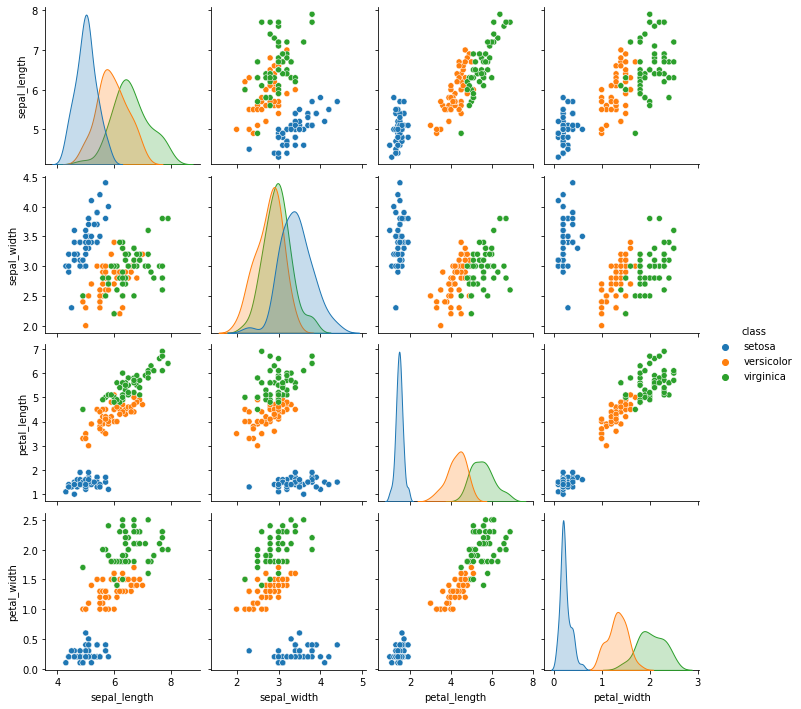

In [74]:
sns.pairplot(idf, hue ="class")

From the kernel density estimate, we can assess that:
- Petal length and petal width are smaller in Setosa class than Versicolor and Virginica class. 
- Sepal width is slightly bigger in Setosa class. 
- Sepal length is smaller in the Setosa class. 
- All attributes in each class seem to approximate a normal distribution. 

From the scatter plots, we can assess that:
- There are relationships between the different Setosa class attributes. These relationships seem to be independent from the Versicolor and Virginica class.

Therefore, these results indicate that there could be clear differences between the Setosa class and the other 2 classes. To verify that these differences statistically significant, we are going to perform a T-Test of each attribute from the Setosa class against the other 2 classes.

The T-test assumes that the data is normally distributed. To confirm it, we are going to do the shapiro-wilk test.

**SHAPIRO-WILK TEST**

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.(2)

We are going to use the "scipy.stats.shapiro" from spicicy.stats.(2)

If the p-value is small (significance level < 0.05), there is a low probability that the data comes from a normal distribution, providing evidence against the null hypothesis.(2)

In [75]:
# Petal length variables per class:
petal_length_setosa = idf.loc[idf["class"] == "setosa", "petal_length"]
petal_length_versicolor = idf.loc[idf["class"] == "versicolor", "petal_length"]
petal_length_virginica = idf.loc[idf["class"] == "virginica", "petal_length"]

# Petal width variables per class: 
petal_width_setosa = idf.loc[idf["class"] == "setosa", "petal_width"]
petal_width_versicolor = idf.loc[idf["class"] == "versicolor", "petal_width"]
petal_width_virginica = idf.loc[idf["class"] == "virginica", "petal_width"]

# Sepal length variables per class:
sepal_length_setosa = idf.loc[idf["class"] == "setosa", "sepal_length"]
sepal_length_versicolor = idf.loc[idf["class"] == "versicolor", "sepal_length"]
sepal_length_virginica = idf.loc[idf["class"] == "virginica", "sepal_length"]

# Sepal width variables per class:
sepal_width_setosa = idf.loc[idf["class"] == "setosa", "sepal_width"]
sepal_width_versicolor = idf.loc[idf["class"] == "versicolor", "sepal_width"]
sepal_width_virginica = idf.loc[idf["class"] == "virginica", "sepal_width"]

# Function to perform the Shapiro-Wilk test and return the results as a dataframe:
def shapiro_test(data, label):
    stat, p_value = shapiro(data)
    return pd.DataFrame({
        "Variable": [label],
        "Statistic": [stat],
        "P-value": [p_value]
    })

# Concatenate the results into a single dataframe:
results = pd.concat([
    shapiro_test(petal_length_setosa, "Petal Length Setosa"),
    shapiro_test(petal_length_versicolor, "Petal Length Versicolor"),
    shapiro_test(petal_length_virginica, "Petal Length Virginica"),
    
    shapiro_test(petal_width_setosa, "Petal Width Setosa"),
    shapiro_test(petal_width_versicolor, "Petal Width Versicolor"),
    shapiro_test(petal_width_virginica, "Petal Width Virginica"),
    
    shapiro_test(sepal_length_setosa, "Sepal Length Setosa"),
    shapiro_test(sepal_length_versicolor, "Sepal Length Versicolor"),
    shapiro_test(sepal_length_virginica, "Sepal Length Virginica"),
    
    shapiro_test(sepal_width_setosa, "Sepal Width Setosa"),
    shapiro_test(sepal_width_versicolor, "Sepal Width Versicolor"),
    shapiro_test(sepal_width_virginica, "Sepal Width Virginica"),
], ignore_index=True)

# Display results in a table:
table = tabulate(results, headers="keys", tablefmt="fancy_grid", showindex=False)
print(table)

╒═════════════════════════╤═════════════╤═════════════╕
│ Variable                │   Statistic │     P-value │
╞═════════════════════════╪═════════════╪═════════════╡
│ Petal Length Setosa     │    0.954946 │ 0.0546492   │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Length Versicolor │    0.966005 │ 0.158483    │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Length Virginica  │    0.962186 │ 0.109774    │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Width Setosa      │    0.813817 │ 1.85258e-06 │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Width Versicolor  │    0.947627 │ 0.0272782   │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Width Virginica   │    0.959772 │ 0.0869574   │
├─────────────────────────┼─────────────┼─────────────┤
│ Sepal Length Setosa     │    0.977699 │ 0.459528    │
├─────────────────────────┼─────────────┼─────────────┤
│ Sepal Length Versicolor │    0.977836 │ 0.4647

Assuming a significance level lower than 0.05 to reject the null hypothesis and conclude that the data is not normally distributed. These results indicate that:
- The majority of attributes seem to approximate to a normal distribution. 
- Petal Width Setosa and Petal Width Versicolor may not be normally distributed. To clarify it, we are going to perform a probability plot.

**Petal width setosa and petal width versicolor - Probability plot**

The probability plot is a graphical technique which allows to assess whether a data set follows a distribution such as the normal distribution.(3) 

We are going to use the "scipy.stats.probplot" from spicy stats to generate the probability plot to compare the Petal Width Setosa and Petal Width Versicolor distribution against the quantiles of a normal distribution.(4) 

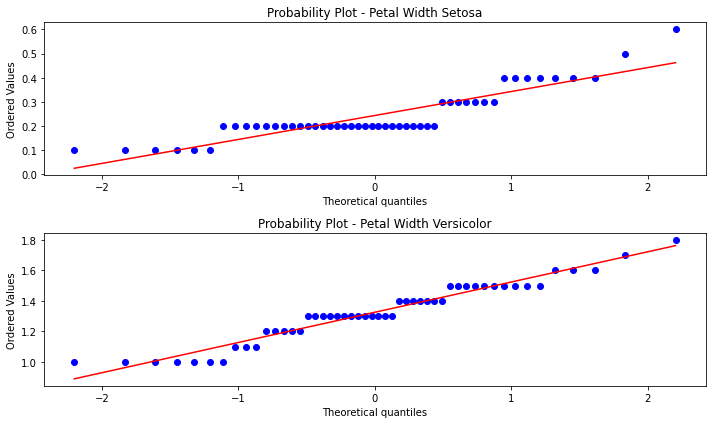

In [76]:
# Probplot for petal_width_setosa and petal_width_versicolor

# Probability plots for each variable:
plt.figure(figsize=(10, 6))

# Probability plot for Petal Width Setosa
plt.subplot(2, 1, 1)
probplot(petal_width_setosa, plot=plt)
plt.title('Probability Plot - Petal Width Setosa')

# Probability plot for Petal Width Versicolor
plt.subplot(2, 1, 2)
probplot(petal_width_versicolor, plot=plt)
plt.title('Probability Plot - Petal Width Versicolor')

plt.tight_layout()
plt.show()

Interpretation: 
- The data seems to approximate to a normal distribution. 
- The presence of outliers could explain why the distribution appears more skewed, affecting the assumption of data normally distributed. 

**T-TEST: SEPAL LENGTH**

Using "scipy.stats.ttest_ind" from spicy.stats, we can calculate the t-test for the means of two independent samples.(5)

For the null hypothesis, we can assume that the 2 independent samples have identical average values.(5)

In [77]:
# t-test sepal length

classes = ["setosa", "virginica", "versicolor"]

# Function sepal_length: it separates the sepal length attibute per class and returns a dictionary.
def sepal_length (): 
    sepal_lengths_by_class = {}

    for class_name in classes:
        class_df = idf[idf["class"] == class_name]
        sepal_lengths_by_class[class_name] = class_df["sepal_length"].tolist()

    return sepal_lengths_by_class

# Call the sepal_length function and store the result in a new variable:
sepal_lengths_by_class = sepal_length()

# Function t_test_sepal_length: it performs a t-test and returns a dictionary.
def t_test_sepal_length(class1, class2):
    
    t_statistic, p_value = ttest_ind(class1, class2)
    
    result = {
        "T-statistic": t_statistic,
        "P-value": p_value
        
    }

    return result

# List to store the results of t-tests
t_test_setosa_vs_virginica = []
t_test_setosa_vs_versicolor = []

# Call the function for Setosa vs Virginica and append the result to the list
t_test_result = t_test_sepal_length(sepal_lengths_by_class["setosa"], sepal_lengths_by_class["virginica"])
t_test_setosa_vs_virginica.append(t_test_result)

# Call the function for Setosa vs Versicolor and append the result to the list
t_test_result = t_test_sepal_length(sepal_lengths_by_class["setosa"], sepal_lengths_by_class["versicolor"])
t_test_setosa_vs_versicolor.append(t_test_result)

We will follow the same process from above for all the attributes. Finally, we will include all the results in a table.

**T-TEST: PETAL LENGTH**

In [78]:
def petal_length (): 
    petal_lengths_by_class = {}

    for class_name in classes:
        class_df = idf[idf["class"] == class_name]
        petal_lengths_by_class[class_name] = class_df["petal_length"].tolist()

    return petal_lengths_by_class

petal_lengths_by_class = petal_length()

def t_test_petal_length(class1, class2):
    
    t_statistic, p_value = ttest_ind(class1, class2)
    
    result = {
        "T-statistic": t_statistic,
        "P-value": p_value
    }

    return result

t_test_setosa_vs_virginica_pl = []
t_test_setosa_vs_versicolor_pl= []

t_test_result = t_test_petal_length(petal_lengths_by_class["setosa"], petal_lengths_by_class["virginica"])
t_test_setosa_vs_virginica_pl.append(t_test_result)

t_test_result = t_test_petal_length(petal_lengths_by_class["setosa"], petal_lengths_by_class["versicolor"])
t_test_setosa_vs_versicolor_pl.append(t_test_result)

**T-TEST: SEPAL WIDTH**

In [79]:
def sepal_width (): 
    sepal_widths_by_class = {}

    for class_name in classes:
        class_df = idf[idf["class"] == class_name]
        sepal_widths_by_class[class_name] = class_df["sepal_width"].tolist()

    return sepal_widths_by_class

sepal_widths_by_class = sepal_width()

def t_test_sepal_width(class1, class2):
    
    t_statistic, p_value = ttest_ind(class1, class2)
    
    result = {
        "T-statistic": t_statistic,
        "P-value": p_value,
        
    }

    return result

t_test_setosa_vs_virginica_sw = []
t_test_setosa_vs_versicolor_sw= []

t_test_result = t_test_sepal_width(sepal_widths_by_class["setosa"], sepal_widths_by_class["virginica"])
t_test_setosa_vs_virginica_sw.append(t_test_result)

t_test_result = t_test_sepal_width(sepal_widths_by_class["setosa"], sepal_widths_by_class["versicolor"])
t_test_setosa_vs_versicolor_sw.append(t_test_result)

**T-TEST: PETAL WIDTH**

In [80]:
def petal_width (): 
    petal_widths_by_class = {}

    for class_name in classes:
        class_df = idf[idf["class"] == class_name]
        petal_widths_by_class[class_name] = class_df["petal_width"].tolist()

    return petal_widths_by_class

petal_widths_by_class = petal_width()

def t_test_petal_width(class1, class2):
    
    t_statistic, p_value = ttest_ind(class1, class2)
    
    result = {
        "T-statistic": t_statistic,
        "P-value": p_value,
        
    }

    return result

t_test_setosa_vs_virginica_pw = []
t_test_setosa_vs_versicolor_pw= []

t_test_result = t_test_petal_width(petal_widths_by_class["setosa"], petal_widths_by_class["virginica"])
t_test_setosa_vs_virginica_pw.append(t_test_result)

t_test_result = t_test_petal_width(petal_widths_by_class["setosa"], petal_widths_by_class["versicolor"])
t_test_setosa_vs_versicolor_pw.append(t_test_result)

**T-TEST: RESULTS**

Finally, we are going to take the results of each t-test to fit them in a table.

In [81]:
# Results for sepal length
sepal_length_results = [
    {'T-statistic': t_test_setosa_vs_virginica[0]["T-statistic"], 'P-value': t_test_setosa_vs_virginica[0]["P-value"]},
    {'T-statistic': t_test_setosa_vs_versicolor[0]["T-statistic"], 'P-value': t_test_setosa_vs_versicolor[0]["P-value"]}
]

# Results for petal length
petal_length_results = [
    {'T-statistic': t_test_setosa_vs_virginica_pl[0]["T-statistic"], 'P-value': t_test_setosa_vs_virginica_pl[0]["P-value"]},
    {'T-statistic': t_test_setosa_vs_versicolor_pl[0]["T-statistic"], 'P-value': t_test_setosa_vs_versicolor_pl[0]["P-value"]}
]

# Results for sepal width
sepal_width_results = [
    {'T-statistic': t_test_setosa_vs_virginica_sw[0]["T-statistic"], 'P-value': t_test_setosa_vs_virginica_sw[0]["P-value"]},
    {'T-statistic': t_test_setosa_vs_versicolor_sw[0]["T-statistic"], 'P-value': t_test_setosa_vs_versicolor_sw[0]["P-value"]}
]

# Results for petal width
petal_width_results = [
    {'T-statistic': t_test_setosa_vs_virginica_pw[0]["T-statistic"], 'P-value': t_test_setosa_vs_virginica_pw[0]["P-value"]},
    {'T-statistic': t_test_setosa_vs_versicolor_pw[0]["T-statistic"], 'P-value': t_test_setosa_vs_versicolor_pw[0]["P-value"]}
]

# DataFrame
df = pd.DataFrame({
    'Feature': ['Sepal Length', 'Sepal Length', 'Petal Length', 'Petal Length', 'Sepal Width', 'Sepal Width', 'Petal Width', 'Petal Width'],
    'Comparison': ['Setosa vs Virginica', 'Setosa vs Versicolor'] * 4,
    'T-statistic': [result['T-statistic'] for result in sepal_length_results + petal_length_results + sepal_width_results + petal_width_results],
    'P-value': [result['P-value'] for result in sepal_length_results + petal_length_results + sepal_width_results + petal_width_results]
})

# Display the dataframe in a table using tabulate
table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)

print(table)

╒══════════════╤══════════════════════╤═══════════════╤═════════════╕
│ Feature      │ Comparison           │   T-statistic │     P-value │
╞══════════════╪══════════════════════╪═══════════════╪═════════════╡
│ Sepal Length │ Setosa vs Virginica  │     -15.3862  │ 6.89255e-28 │
├──────────────┼──────────────────────┼───────────────┼─────────────┤
│ Sepal Length │ Setosa vs Versicolor │     -10.521   │ 8.98524e-18 │
├──────────────┼──────────────────────┼───────────────┼─────────────┤
│ Petal Length │ Setosa vs Virginica  │     -49.9657  │ 1.56412e-71 │
├──────────────┼──────────────────────┼───────────────┼─────────────┤
│ Petal Length │ Setosa vs Versicolor │     -39.4687  │ 5.71746e-62 │
├──────────────┼──────────────────────┼───────────────┼─────────────┤
│ Sepal Width  │ Setosa vs Virginica  │       6.28938 │ 8.91663e-09 │
├──────────────┼──────────────────────┼───────────────┼─────────────┤
│ Sepal Width  │ Setosa vs Versicolor │       9.28277 │ 4.36224e-15 │
├──────────────┼────

**Results interpretation**
- The null hypothesis is that the means for the attributes from different classes are equals.
- The low p-values indicate that the probability of the means for the attribute in both classes being equal is highly unlikely. 
- The attribute difference between the Setosa class and the other two classes (versicolor and virginica) are statistically significant. Therefore, the setosa class may be separated from the other two classes. 

**References**

1. Seaborn pairplot: https://seaborn.pydata.org/generated/seaborn.pairplot.html  
2. Shapiro-Wilk test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html  
3. Probability plot: https://www.itl.nist.gov/div898/handbook/eda/section3/probplot.htm  
4. Spicy.stats Probability Plot: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html  
5. Spicy.stats t-test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html  


## **TASK 5. PRINCIPAL COMPONENT ANALYSIS ON THE IRIS DATA SET**

***

Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two. Explain the purpose of the analysis and your results.

**What is the purpose of a principal component analysis?**

The principal component analysis (PCA) is a dimensionality reduction technique used to simplify complex datasets. It aims to reduce the number of features or variables while preserving essential information. By finding new uncorrelated variables called principal components, PCA helps achieve this reduction.(1)

PCA identifies the axes along which data varies the most, ranking them by importance. It captures maximum variance in the first principal component, followed by variations in subsequent components. This reduction in dimensionality is beneficial for data visualization, as it makes it easier to understand and interpret high-dimensional data.(1)

PCA is used for feature selection, emphasizing the most significant variables in a dataset. It can be applied in data compression, reducing dataset size while maintaining crucial patterns. Since PCA is an unsupervised learning algorithm, making it useful for exploring relationships among variables without prior knowledge of target variables.(1)

Overall, PCA simplifies data analysis, enhances data visualization, and aids in various machine learning and data-driven tasks by reducing complexity while preserving critical information.(1)

**How to apply the PCA to the Iris Dataset?**

The Iris dataset has four features (sepal length, sepal width, petal length, and petal width). PCA can reduce these dimensions while preserving most of the dataset's variance, making it easier to visualize and analyze.  By analyzing the importance of each principal component, PCA can help identify which original features (sepal length, sepal width, petal length, or petal width) contribute most to the variance in the data. This can guide feature selection for further analysis. 

**Standardize - Why is it necessary?**

Each class of the iris dataset has 4 attributes. Each attribute may have different impact on how the PCA performs.

In [82]:
idf.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In PCA, standardization is crucial because it ensures that all features contribute equally by scaling them to have a mean of 0 and a standard deviation of 1. This prevents features with larger scales from dominating the principal components and guarantees an accurate representation of the data based on variances.(2) This is crucial in marchine learning in order to get an accurate prediction of our data. 

In [83]:
# Remove the "class" column
x = idf.drop('class', axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Example of PCA without Standarization**

For this task, we will use the PCA package from sklearn.(3)

In [84]:
# Create a new PCA
pca = dec.PCA(n_components=2) # number of components required in the output

# Fit the data to the pca
pca.fit(x)

PCA(n_components=2)

In [85]:
# show variablity
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

The result of this array([0.92461621, 0.05301557]) explains variance ratios of the principal components in a PCA analysis. Each value in this array represents the proportion of the total variance in the original data that is explained by each respective principal component.

In this case:

- The first value, 0.92461621, indicates that the first principal component explains approximately 92.46% of the total variance in the dataset. This is a substantial amount of variance and suggests that the first principal component captures most of the information in the data.

- The second value, 0.05301557, represents that the second principal component explains approximately 5.30% of the total variance. While this is a smaller proportion compared to the first component, it still contributes some information, but significantly less than the first component.

The transform() function in PCA converts data into a lower-dimensional representation using principal components. It reduces dimensionality while preserving key information, making it useful for data analysis and machine learning tasks.(4)

In [86]:
# Transform x
x_pca = pca.transform(x)
x_pca

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

Across the dataset, we can observe a big difference on the variances between components.

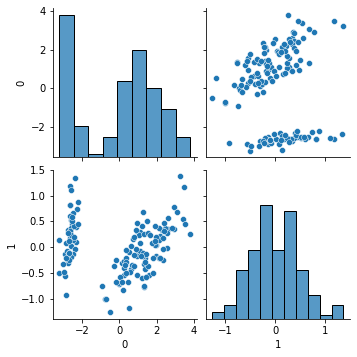

In [87]:
# Array visualization
x_pca_pd = pd.DataFrame(x_pca)
sns.pairplot(x_pca_pd)

From the scatter plot, we can observe that there is a clear difference between components. How does apply to the classes on the iris dataset? 

In [88]:
# Create a new dataframe with the classes column
idf_pca = pd.DataFrame(idf[["class"]])
idf_pca.head()

,class
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [89]:
# Add the results for each component done by the PCA
idf_pca['pca0'] = x_pca[:,0]
idf_pca['pca1'] = x_pca[:,1]
idf_pca.head()

,class,pca0,pca1
0,setosa,-2.684207,0.326607
1,setosa,-2.715391,-0.169557
2,setosa,-2.889820,-0.137346
3,setosa,-2.746437,-0.311124
4,setosa,-2.728593,0.333925


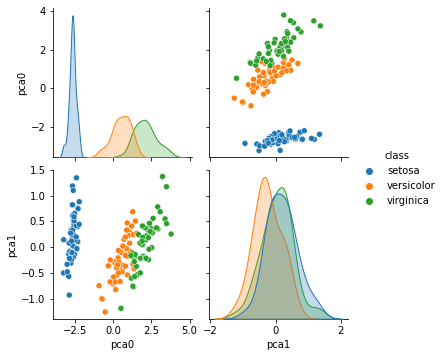

In [90]:
# Visualization
sns.pairplot(idf_pca,hue='class')

Without standarization, we can observe that:
- For the setosa class, both components are easy to differentiate. 
- For the versicolor and virginica class, both components overlap. Making the classes more difficult to differentiate which, in order to apply a machine learning algorithm, it may be a problem.

Will the standarization help to prevent this issue? 

**After standarization**

We will use the standarize feature provided by Sklearn.(5)

In [91]:
# Create a standard scaler.
scaler = pre.StandardScaler()

# Fit the data to the scaler.
scaler.fit(x)

StandardScaler()

In [92]:
# Show the means and variances.
scaler.mean_, scaler.var_

(array([5.84333333, 3.054     , 3.75866667, 1.19866667]),
 array([0.68112222, 0.18675067, 3.09242489, 0.57853156]))

After standardization, the means of all features are centered around zero, and the variances are equalized to approximately 1. 

In [93]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Now, we follow the same steps as before to transform the dataframe.

In [94]:
# Transform new x array.
X_transformed = scaler.transform(x)

# Re-create data frame.
df_X_trans = pd.DataFrame(X_transformed, columns=x.columns)

# Show.
df_X_trans.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [95]:
# Fit the data to the PCA
pca.fit(df_X_trans)

X_trans_pca = pca.transform(df_X_trans)

df_trans_pca = pd.DataFrame(idf[["class"]])

df_trans_pca['pca0'] = X_trans_pca[:,0]
df_trans_pca['pca1'] = X_trans_pca[:,1]

# show principal component analysys after standardization
df_trans_pca.head()

,class,pca0,pca1
0,setosa,-2.264542,0.505704
1,setosa,-2.086426,-0.655405
2,setosa,-2.367950,-0.318477
3,setosa,-2.304197,-0.575368
4,setosa,-2.388777,0.674767


In [96]:
# Look at the variablity
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

With Standardization:

- The first principal component explains approximately 72.77% of the total variance in the standardized data.
- The second principal component explains approximately 23.03% of the total variance.

Comparison:

- In the case without standardization, the first principal component explains a significantly higher proportion of the variance compared to the second component.
- With standardization, the explained variance by the first component is reduced, and the importance of the second component is enhanced.

Standardization has the effect of reducing the impact of individual features' scales on the PCA results, making the contribution of each component more balanced.

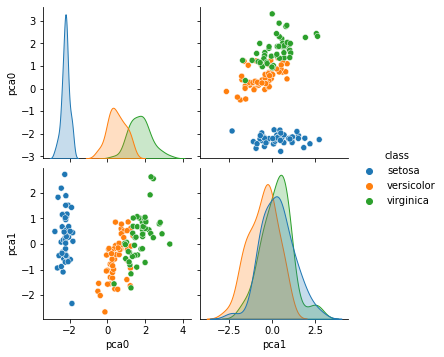

In [97]:
# Visualization
sns.pairplot(df_trans_pca, hue='class')

After standardization, 
- we are still able to clearly separate the setosa class according to the 2 components, and  
- there is still an overlap between versicolor and virginica indicating that 2 of the features have common dimensions in a certain range for both classes.

**Will a machine learning algorithm like k-nearest neighbors (KNN) be able to see the difference?**

For this task, we will implement the KNN neighbors classifier from sklearn.(6)

In [98]:
# before scaling

clf = sk.neighbors.KNeighborsClassifier()

# x data
x = x

# y data
y = idf["class"].to_numpy()

# train test split
sk.model_selection.cross_val_score(clf, x, y)


array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [99]:
# after scaling the data
clf = sk.neighbors.KNeighborsClassifier()

# x data
x = X_transformed

# y data
y = idf["class"].to_numpy()

# train test split
sk.model_selection.cross_val_score(clf, x, y)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Before Scaling:

- Cross-validation scores before scaling range from 0.9333 to 1.0. These scores indicate the accuracy of the KNN classifier when applied to the original, unstandardized data.
- The variation in scores may be due to differences in feature scales since KNN is sensitive to the scales of features.
- The highest score of 1.0 suggests that the classifier achieved perfect accuracy in at least one fold.

After Scaling:

- Cross-validation scores after scaling the data remain consistent, ranging from 0.9333 to 1.0.
- Standardizing the data (scaling) didn't significantly change the model's performance in terms of cross-validation accuracy.
- This suggests that, in this specific case, the KNN classifier may not be strongly affected by the differences in feature scales.

**Conclusion**

In summary, the application of PCA to the Iris dataset serves to simplify the data, aid in visualization, identify crucial features, and potentially improve the performance of data analysis and machine learning tasks. This preprocessing step enhances our understanding of the dataset's structure and relationships.

Upon reducing the dataset to two dimensions, we observe distinct differences between two components. However, regarding class separation, the differences are more pronounced in the setosa class, while virginica and versicolor exhibit some overlap, even after scaling. This overlap may pose challenges for machine learning algorithms.

Interestingly, the evaluation of a K-nearest neighbors classifier before and after scaling the data reveals similar cross-validation accuracy. This suggests that feature scaling may not significantly impact the classifier's performance in this specific case. It implies that, despite the apparent overlap in class regions, machine learning algorithms may still achieve high predictive accuracy.

**REFERENCES**


1. Principal Component Analysis(PCA): https://www.geeksforgeeks.org/principal-component-analysis-pca/  
2. https://builtin.com/data-science/step-step-explanation-principal-component-analysis  
3. PCA sklearn. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
4. Transform method. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform  
5. StandardScaler method. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
6. KNN classifier. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  